# Go Bike Data Visualization
## by Victor Pham

# Table of Contents

1.0 [Preliminary Wrangling](#wrangle) <br>
2.0 [Univariate Exploration](#univariate) <br>
3.0 [Bivariate Exploration](#bivariate) <br>
4.0 [Multivariate Exploration](#multivariate)<br>

## <u> 1.0 Preliminary Wrangling </u>
<a id = "wrangle"></a>

This is a dataset of the bikeshare program called Go Bike that is run in San Fransisco, California. The dataset shares individual recorded ride trips in a specific time frame.

The dataset also shares information about the time of user using the ride-share program, including gender, age and type of customer.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime as dt

#Calculate distance from coordinates
import geopy.distance
from math import sqrt

%matplotlib inline

In [3]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [4]:
#df_twitter_test.tweet_id = df_twitter.tweet_id.astype(str)

df.start_station_id = df.start_station_id.astype(str)
df.end_station_id = df.end_station_id.astype(str)
df.bike_id = df.bike_id.astype(str)

In [69]:
df.start_station_name.value_counts().nlargest(15)

Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3406
Berry St at 4th St                                           2951
Montgomery St BART Station (Market St at 2nd St)             2711
Powell St BART Station (Market St at 4th St)                 2620
San Francisco Caltrain (Townsend St at 4th St)               2572
San Francisco Ferry Building (Harry Bridges Plaza)           2540
Howard St at Beale St                                        2216
Steuart St at Market St                                      2191
Powell St BART Station (Market St at 5th St)                 2144
The Embarcadero at Sansome St                                1975
Bancroft Way at Telegraph Ave                                1761
Bancroft Way at College Ave                                  1712
2nd St at Townsend St                                        1702
Beale St at Harrison St                                      1678
Name: star

In [6]:
print(df.shape)
print(df.dtypes)
print(df.head(10))

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id            object
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id              object
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                     object
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time start_station_id                                start_station_name  start_station_latitude  start_station_longitude end_station_id                              end_station_name  end_station_latitude  end_station_longitude bike_id   user_type  member_birth_year member_gender bike_share_for_all_trip
0         52185  2019-02-28 17:32:10.1450  201

In [7]:
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [8]:
df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
323,275,2019-02-28 21:52:54.9590,2019-02-28 21:57:30.5860,198.0,Snow Park,37.807813,-122.264496,196.0,Grand Ave at Perkins St,37.808894,-122.256460,2733,Subscriber,NaN,NaN,No
149362,601,2019-02-06 19:24:04.5620,2019-02-06 19:34:06.0220,337.0,Webster St at 19th St,37.806970,-122.266588,230.0,14th St at Mandela Pkwy,37.810743,-122.291415,1324,Subscriber,1994.0,Male,No
4852,307,2019-02-28 14:49:32.9050,2019-02-28 14:54:40.5920,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,4436,Subscriber,1992.0,Male,No
33468,1307,2019-02-24 11:26:22.7400,2019-02-24 11:48:10.4460,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,151.0,53rd St at Hollis St,37.836182,-122.287180,6452,Subscriber,1986.0,Male,No
5536,510,2019-02-28 12:50:32.8330,2019-02-28 12:59:02.8540,24.0,Spear St at Folsom St,37.789677,-122.390428,13.0,Commercial St at Montgomery St,37.794231,-122.402923,6522,Subscriber,1980.0,Male,No
88770,706,2019-02-16 17:18:50.4530,2019-02-16 17:30:36.9750,351.0,10th St at University Ave,37.869060,-122.293400,351.0,10th St at University Ave,37.869060,-122.293400,6466,Subscriber,1970.0,Male,Yes
124873,420,2019-02-11 08:12:52.7850,2019-02-11 08:19:53.6610,364.0,China Basin St at 3rd St,37.772000,-122.389970,321.0,5th St at Folsom,37.780146,-122.403071,5217,Subscriber,1989.0,Female,No
110027,1253,2019-02-12 18:08:54.9230,2019-02-12 18:29:47.9660,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,24.0,Spear St at Folsom St,37.789677,-122.390428,5526,Subscriber,1962.0,Male,No
90665,366,2019-02-16 11:53:42.0510,2019-02-16 11:59:48.8890,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,81.0,Berry St at 4th St,37.775880,-122.393170,6216,Subscriber,1961.0,Male,No
121358,146,2019-02-11 15:35:51.1650,2019-02-11 15:38:17.4870,9.0,Broadway at Battery St,37.798572,-122.400869,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,5290,Customer,1959.0,Male,No


In [9]:
df.query('member_birth_year == 0').count()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

### Sample Data Calculations

In [10]:
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
df['duration_min'] = df['duration_sec']/60

In [11]:
#Grab Month from Datetime column
#Add the day of the week and the month to parse these time variables later on to find any trends
#df['Month'] = df['start_time'].dt.strftime('%b')
#df['Full_Month'] = df['start_time'].dt.strftime('%B')
df['Weekday'] = df['start_time'].dt.strftime('%A')
df['Age'] = 2019 - df['member_birth_year']

In [12]:
#Calculate distance in km between GPS points for later analysis
from geopy import distance
def calc_distance(from_lat, from_long, to_lat, to_long):
    return distance.distance((from_lat, from_long), (to_lat, to_long)).kilometers


In [13]:
df['distance_km'] = df.apply(lambda row: calc_distance(row.start_station_latitude, row.start_station_longitude, row.end_station_latitude, row.end_station_longitude), axis = 1)

In [14]:
df.query('Age > 100').count()

duration_sec               72
start_time                 72
end_time                   72
start_station_id           72
start_station_name         72
start_station_latitude     72
start_station_longitude    72
end_station_id             72
end_station_name           72
end_station_latitude       72
end_station_longitude      72
bike_id                    72
user_type                  72
member_birth_year          72
member_gender              72
bike_share_for_all_trip    72
duration_min               72
Weekday                    72
Age                        72
distance_km                72
dtype: int64

In [15]:
#Remove bad member birth years
df = df[df['member_birth_year'] != 0]
df = df[df['Age'] < 100]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175075 entries, 0 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             175075 non-null  int64         
 1   start_time               175075 non-null  datetime64[ns]
 2   end_time                 175075 non-null  datetime64[ns]
 3   start_station_id         175075 non-null  object        
 4   start_station_name       174880 non-null  object        
 5   start_station_latitude   175075 non-null  float64       
 6   start_station_longitude  175075 non-null  float64       
 7   end_station_id           175075 non-null  object        
 8   end_station_name         174880 non-null  object        
 9   end_station_latitude     175075 non-null  float64       
 10  end_station_longitude    175075 non-null  float64       
 11  bike_id                  175075 non-null  object        
 12  user_type       

In [17]:
df.member_gender.isnull().sum()

0

In [18]:
df.member_birth_year.fillna(0, inplace = True)

In [19]:
df['member_birth_year'] = df['member_birth_year'].astype(int)
#df['start_station_id'] = df['start_station_id'].astype(int)
#df['end_station_id'] = df['end_station_id'].astype(int)

In [20]:
df.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,duration_min,Age,distance_km
count,175075.000000,175075.000000,175075.000000,175075.000000,175075.000000,175075.000000,175075.000000,175075.000000,175075.000000
mean,704.231524,37.770801,-122.351304,37.770994,-122.350881,1984.841222,11.737192,34.158778,1.689061
std,1641.917862,0.101087,0.118467,0.100995,0.118033,9.972079,27.365298,9.972079,1.096220
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1920.000000,1.016667,18.000000,0.000000
25%,323.000000,37.770407,-122.411901,37.770407,-122.411647,1980.000000,5.383333,27.000000,0.907248
50%,510.000000,37.780760,-122.398279,37.781010,-122.397405,1987.000000,8.500000,32.000000,1.428159
75%,789.000000,37.797320,-122.283093,37.797673,-122.285171,1992.000000,13.150000,39.000000,2.221856
max,84548.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000,1409.133333,99.000000,69.465977


### What is the structure of your dataset?

This dataset is of the Ford Go Bike Tripdata, which constitutes individual rides made in a bike-sharing system covering the greater San Francisco Bay Area.

Each row is an individual ride, showing the length, the start and end stations and information regarding the members. Some data types have been altered.

- start_station_id - As type string
- end_station_id - As type string
- Bike_id - As type string

Based on some preliminary analysis, some variables have been identified with data types that can be changed, or unit types that can be altered to be clear. Some examples include:

<li> Convert duration from seconds into minutes </li>
<li> Export day of the week from date variable </li>
<li> Calculate linear distance from start and end stations in kilometers </li>
<li> Filter out age inputs that do not seem reliable (i.e. age is 0 or over 100). </li>


### What is/are the main feature(s) of interest in your dataset?

I am interesting in seeing when are most trips taken in terms of time of day, day of the week, or month of th year? Im interested in seeing how long the average trip takes for specific regions or stations, and how does the age and type of subscriber or customer affects ride lengths.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that subcribers will have shorter and more frequent trips because of the payment structure. While customers will have longer, lengthier trips as one-use customers using the service. I also expect some stations to be "hot-spots" based on their central location in San Francisco.

## <b> 2.0 Univariate Exploration </b>
<a id = "univariate"> </a>

> In the univariate exploration, we will be taking a look at individual variables to identify unusual points, outliers, see if anything requires additional data cleaning and identfy variables worth investigating more in relation to other variables.

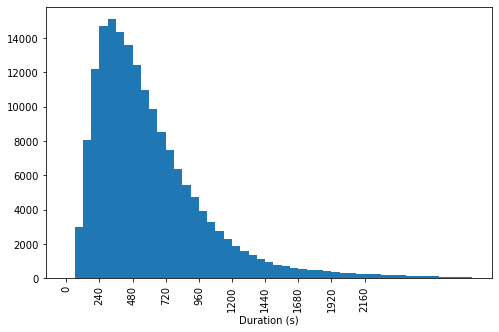

In [21]:
# Histogram to see the duration (s) distribution
binsize = 60

#bins = np.arange(0, df['duration_sec'].max()+binsize, binsize)
bins = np.arange(0, 3000, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xlabel('Duration (s)')
#plt.xticks([0,120,240,360,480, 600, 720, 840, 960, 1080])
plt.xticks(rotation=90)
plt.xticks(np.arange(0, 2160+240, 240))
plt.show()

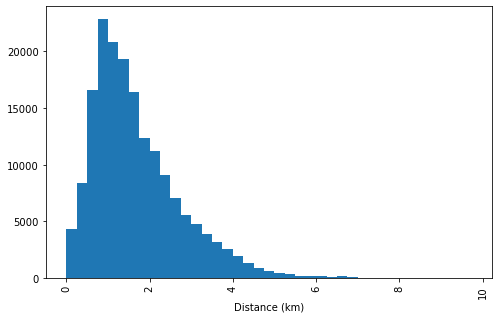

In [22]:
# Histogram to see the duration (min) distribution
binsize = 0.25

#bins = np.arange(0, df['duration_sec'].max()+binsize, binsize)
bins = np.arange(0, 10, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'distance_km', bins = bins)
plt.xlabel('Distance (km)')
plt.xticks(rotation=90)
plt.show()

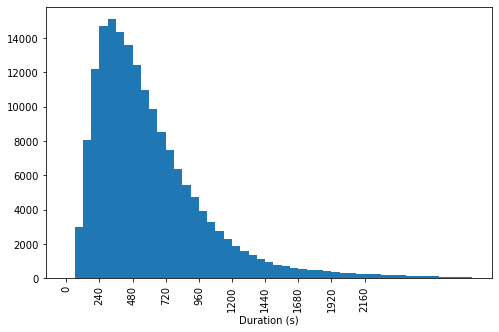

In [23]:
# Histogram to see the duration (s) distribution
binsize = 60

bins = np.arange(0, 3000, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xlabel('Duration (s)')
plt.xticks(rotation=90)
plt.xticks(np.arange(0, 2160+240, 240))
plt.show()

Interestingly, the highest grouping of points is around 360 minutes, which is approximately 5 minutes. I would assume this is for very short bike rides for quick commutes around town

Text(0.5, 0, 'Age (years)')

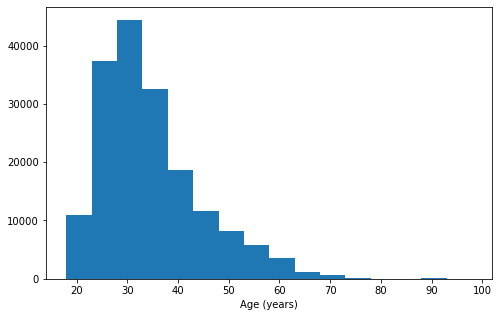

In [24]:
# Histogram to see the relative age of our riders
binsize = 5
bins = np.arange(18, 100, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'Age', bins = bins)
plt.xlabel('Age (years)')

### Relative proportions via Pie Charts


The point of these observations is to get the relative proportions of the different user segments.

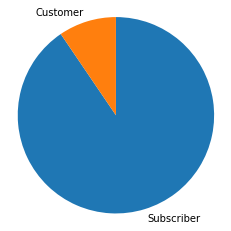

In [25]:
# Pie chart for Customers versus Subscribers
sorted_counts = df['user_type'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);
plt.axis('square');

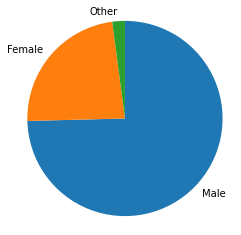

In [26]:
# Pie chart for Customers versus Subscribers
sorted_counts_gen = df['member_gender'].value_counts()

plt.pie(sorted_counts_gen, labels = sorted_counts_gen.index, startangle = 90, counterclock = False);
plt.axis('square');

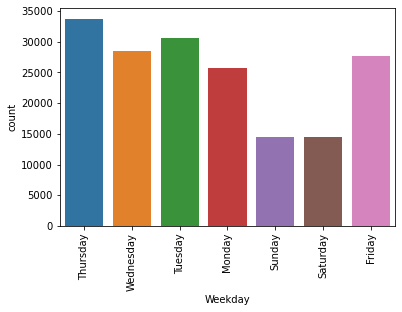

In [27]:
#Count per day of the week.
ax = sb.countplot(data = df, x = 'Weekday')
#ax.legend(loc = 4, framealpha = 1)
plt.xticks(rotation = 90);

### Start Station Analysis

In [28]:
type_counts = df['start_station_name'].value_counts().iloc[:20]
type_counts
type_order = type_counts.index

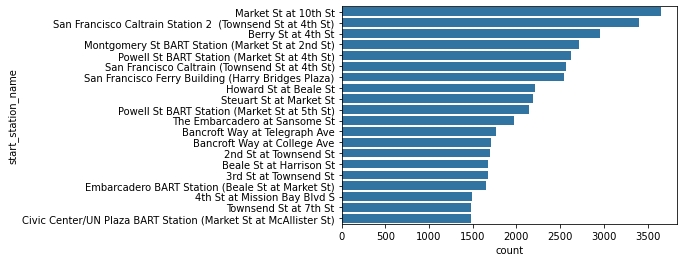

In [29]:
#Top 20 Start stations
base_color = sb.color_palette()[0]
sb.countplot(data = df, y = 'start_station_name', color = base_color, order = type_order);

### End Station Analysis

In [30]:
type_counts_end = df['end_station_name'].value_counts().iloc[:20]
type_order_end = type_counts_end.index

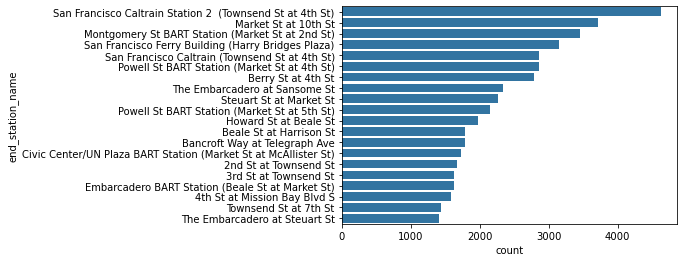

In [31]:
#Top 20 End stations
base_color = sb.color_palette()[0]
sb.countplot(data = df, y = 'end_station_name', color = base_color, order = type_order_end);

### Univariate Discussion
 
In this section histograms, pie charts and bar charts were used to identify trends in the data. The histograms and bar charts were used to identify the distribution in the data and peak values, while the pie charts were used to understand the user base relative to other groups or the days of the week.

Interestingly as you go through the the variable's of interest, I found it surprising that significantly more males use the ride share versus females, and subscribers consist of the bulk of the rideshare portion, although the customer portion is significant enough to still attract these types of customers.

It is also interesting to note that the numerous bike rides are usually short in length, as the bikeshare is used for frequent small trips versus longer ones, this may be incentive through the nature of the payment system (i.e. overcharge for subscribers over 30 minutes).

I found the age distribution quite interesting, with most users being born between 1985 to 1995, which puts them during the time of the study to be approximately young to mid adult range.

A lot of the ID values were converting into strings, as numerical analysis does not apply to them. The location IDs probably correspond to a specific location and can pinpoint popular locations. Just from the names alone, it looks like Market street is very popular commuting location as most of the top 20 locations intersect with Market street and various other streets..Townsend St is also a re-occuring location.

Moving forward in the bivariate exploration, it will be interesting to see the relationship between locations, time used, frequenct of use and the types of customers/ages to determine the main consumer segments of this bikeshare program. 

Based on this analysis, distance in km and duration will be used as a dependant variable while the other variables will be investigated as independant variables. 

##  3.0 Bivariate Exploration
<a id = "bivariate"></a>

In this section we want to use bivariate exploration to explore how variables interact with each other. Initial exploration will check how the interactions work with the duration of the trips, if we can tell what kind of customer or segments.

Additionally see how many the age of customers versus subcribers.

In [ ]:
df.start_station_name.value_counts().nlargest(10)

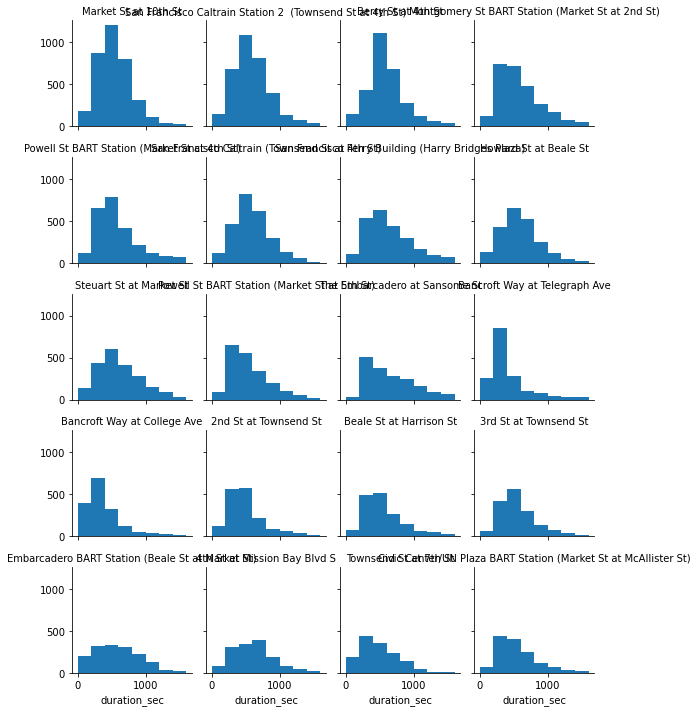

In [33]:
g = sb.FacetGrid(data = df, col = 'start_station_name', col_wrap = 4, height = 2, col_order = type_order)
g.map(plt.hist, 'duration_sec', bins = np.arange(0, 1500+200,200));
g.set_titles('{col_name}');

Although there may be some more information to gather from the stations, this will not be the main focus of the visualizations.

When grouping together the segments, the average duration was used as in indicator to see how the different customer types compare.

In [34]:
df_gender = df.groupby("member_gender", as_index=False).mean()
df_gender

,member_gender,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,duration_min,Age,distance_km
0,Female,779.147637,37.780391,-122.356852,37.780556,-122.356208,1985.811952,12.985794,33.188048,1.765294
1,Male,672.635718,37.767029,-122.349438,37.767241,-122.349075,1984.585257,11.210595,34.414743,1.662263
2,Other,996.589154,37.798441,-122.356032,37.798309,-122.355919,1983.141057,16.609819,35.858943,1.795087


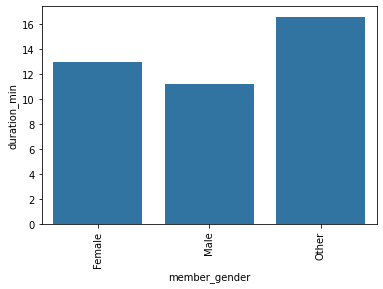

In [35]:
# YOUR CODE HERE
base_color = sb.color_palette()[0]
sb.barplot(data = df_gender, x = 'member_gender', y = 'duration_min', color = base_color)
plt.xticks(rotation = 90);

It should be noted that significant more male users use the service compared to females and other, which should be kept in mind while looking at these grouped visualizations.

In [36]:
test = df.query('duration_sec < 2500')

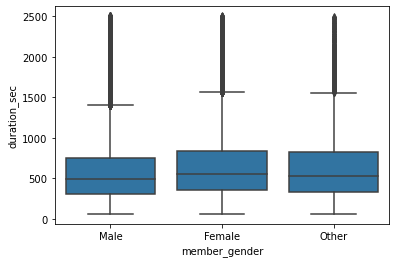

In [37]:
sb.boxplot(data = test, x = 'member_gender', y = 'duration_sec', color = base_color);

In [38]:
#Stats presented based on member_gender
test.groupby('member_gender').duration_sec.describe()

,count,mean,std,min,25%,50%,75%,max
member_gender,,,,,,,,
Female,40019.0,651.714835,405.243531,61.0,357.0,558.0,839.0,2499.0
Male,128768.0,582.865875,386.803621,61.0,309.0,487.0,746.0,2497.0
Other,3516.0,644.856371,430.702851,63.0,337.0,535.5,826.0,2495.0


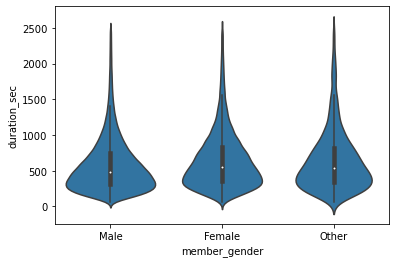

In [39]:
sb.violinplot(data = test, x = 'member_gender', y = 'duration_sec', color = base_color);

C:\Users\victo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\victo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\victo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 720x720 with 0 Axes>

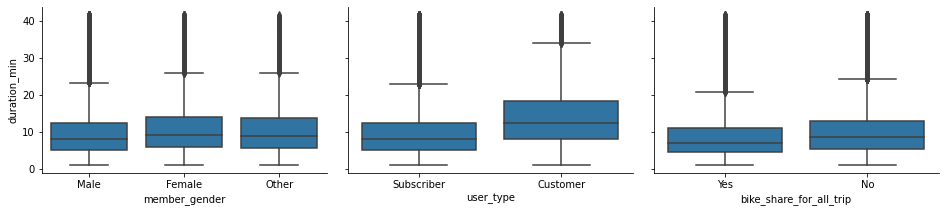

In [40]:
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10,10])
g = sb.PairGrid(data = test, y_vars = ['duration_min'], x_vars = ['member_gender','user_type', 'bike_share_for_all_trip'], height = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

In [41]:
#Stats presented based on user_type
print(test.groupby('member_gender').duration_sec.describe())
print(test.groupby('user_type').duration_sec.describe())
print(test.groupby('bike_share_for_all_trip').duration_sec.describe())

                  count        mean         std   min    25%    50%    75%     max
member_gender                                                                     
Female          40019.0  651.714835  405.243531  61.0  357.0  558.0  839.0  2499.0
Male           128768.0  582.865875  386.803621  61.0  309.0  487.0  746.0  2497.0
Other            3516.0  644.856371  430.702851  63.0  337.0  535.5  826.0  2495.0
               count        mean         std   min    25%    50%     75%     max
user_type                                                                       
Customer     15527.0  847.440523  484.947345  62.0  481.0  740.0  1106.0  2497.0
Subscriber  156776.0  575.627360  374.148128  61.0  310.0  486.0   739.0  2499.0
                            count        mean         std   min    25%    50%    75%     max
bike_share_for_all_trip                                                                     
No                       155513.0  606.119321  390.176433  61.0  326.0  513

C:\Users\victo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\victo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\victo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 720x720 with 0 Axes>

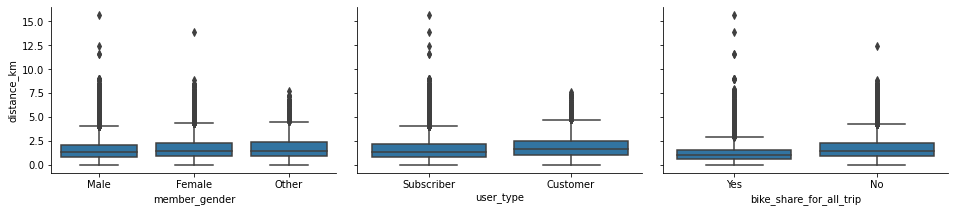

In [42]:
plt.figure(figsize = [10,10])
g = sb.PairGrid(data = test, y_vars = ['distance_km'], x_vars = ['member_gender','user_type', 'bike_share_for_all_trip'], height = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

In [43]:
#Stats presented for distance km by group types
print(test.groupby('member_gender').distance_km.describe())
print(test.groupby('user_type').distance_km.describe())
print(test.groupby('bike_share_for_all_trip').distance_km.describe())

                  count      mean       std  min       25%       50%       75%        max
member_gender                                                                            
Female          40019.0  1.766027  1.084424  0.0  0.960800  1.517672  2.361798  13.915237
Male           128768.0  1.662481  1.064808  0.0  0.896858  1.406893  2.167595  15.711156
Other            3516.0  1.808897  1.179553  0.0  0.969606  1.501744  2.411337   7.722277
               count      mean       std  min       25%       50%       75%        max
user_type                                                                             
Customer     15527.0  1.911445  1.122347  0.0  1.092872  1.706037  2.568222   7.644373
Subscriber  156776.0  1.667539  1.065333  0.0  0.898426  1.404583  2.178209  15.711156
                            count      mean       std  min       25%       50%       75%        max
bike_share_for_all_trip                                                                            
No

Interestingly here, the customers tend to take longer trips on average. This would make sense as there is most likely a standard base fee for taking out a bike each time, whereas subscribers that pay a set fee, are free to take smaller trips without penalty.

In [44]:
ranges = [18,30,40,50,60,70,80,90,100]
df_year = df.groupby(pd.cut(df.Age, ranges)).mean()

In [45]:
df_year

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,duration_min,Age,distance_km
Age,,,,,,,,,
"(18, 30]",708.066563,37.756905,-122.328340,37.757070,-122.327934,1993.083368,11.801109,25.916632,1.634751
"(30, 40]",687.884419,37.782493,-122.371121,37.782749,-122.370525,1984.315046,11.464740,34.684954,1.767734
"(40, 50]",713.497823,37.779662,-122.365396,37.779781,-122.365064,1974.080816,11.891630,44.919184,1.687551
"(50, 60]",736.022779,37.780429,-122.365945,37.780520,-122.366002,1964.291983,12.267046,54.708017,1.641920
"(60, 70]",764.203723,37.763385,-122.337454,37.764007,-122.337649,1955.057191,12.736729,63.942809,1.600759
"(70, 80]",727.117493,37.773647,-122.344871,37.773785,-122.344807,1945.561358,12.118625,73.438642,1.535731
"(80, 90]",276.060870,37.778274,-122.410283,37.777051,-122.411174,1931.573913,4.601014,87.426087,0.826218
"(90, 100]",506.400000,37.781275,-122.406474,37.777954,-122.398091,1923.000000,8.440000,96.000000,1.503690


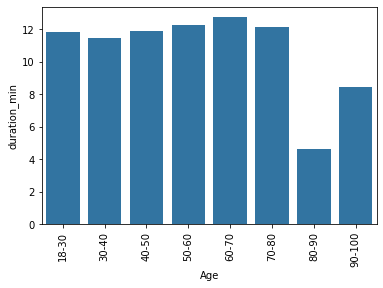

In [46]:
# YOUR CODE HERE
xlabel = ['18-30','30-40','40-50','50-60','60-70', '70-80', '80-90','90-100']
base_color = sb.color_palette()[0]
ax = sb.barplot(data = df_year, x = 'Age', y = 'duration_min', color = base_color)
plt.xticks(rotation = 90);
ax.set_xticklabels(xlabel);


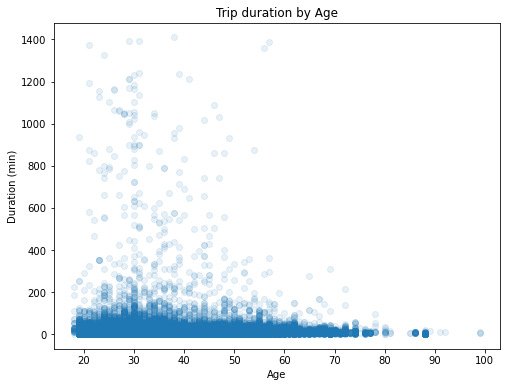

In [47]:
# Scatter Plot Age versus Duration (min)
plt.figure(figsize = [8, 6])
plt.scatter(data = df, x = 'Age', y = 'duration_min', alpha = 1/10)
plt.xlabel('Age')
plt.ylabel('Duration (min)')
plt.title("Trip duration by Age")
plt.show()

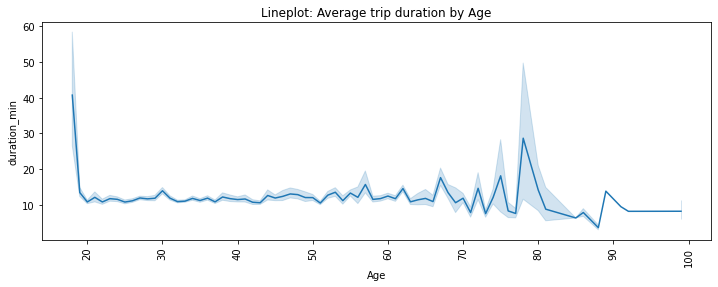

In [48]:
#Line plot shows the mean and 95% confidence intevals
fig,ax = plt.subplots(figsize=(12,4))
sb.lineplot(data= df, x='Age', y='duration_min')# hue='Year', ax=ax, palette='nipy_spectral')
ax.set(title="Lineplot: Average trip duration by Age")
plt.xticks(rotation = 90);

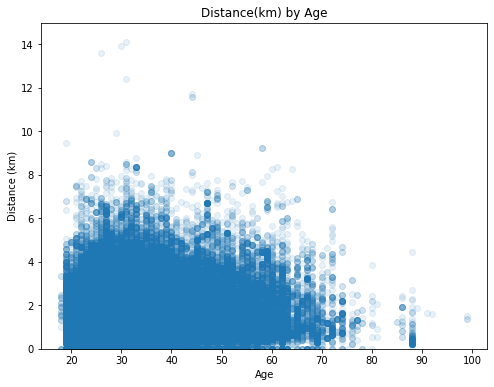

In [49]:
#Age versus km
plt.figure(figsize = [8, 6])
plt.scatter(data = df, x = 'Age', y = 'distance_km', alpha = 1/10)
plt.ylim([0, 15])
plt.xlabel('Age')
plt.ylabel('Distance (km)')
plt.title("Distance(km) by Age")
plt.show()

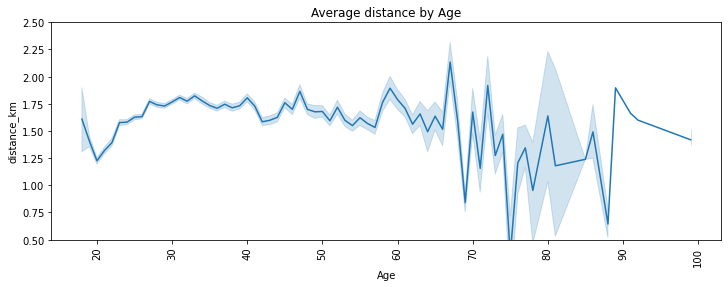

In [50]:
#Line plot shows the mean and 95% confidence intevals
fig,ax = plt.subplots(figsize=(12,4))
sb.lineplot(data= df, x='Age', y='distance_km')# hue='Year', ax=ax, palette='nipy_spectral')
ax.set(ylim=(0.5, 2.5))
ax.set(title="Average distance by Age")
plt.xticks(rotation = 90);

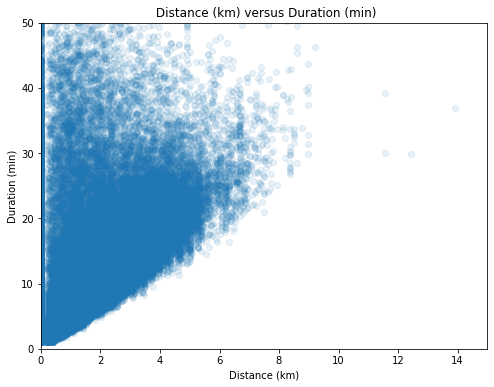

In [51]:
#Distance versus Duration (min)
# I limited the duration to 100 minutes, as the 75 percentile was around 13 minutes, 
plt.figure(figsize = [8, 6])
plt.scatter(data = df,  x = 'distance_km',y = 'duration_min', alpha = 1/10)
plt.ylim([0, 50])
plt.xlim([0, 15]) #This gets rid of zero values
plt.xlabel('Distance (km)')
plt.ylabel('Duration (min)')
plt.title(' Distance (km) versus Duration (min)')
plt.show()

Interestingly, there seems to be a minimum "line" as the distance increases, this makes sense as unless you are extremely fast on a bike, there is a minimum amount of time required to reach a certain distance in km. 

Text(0.5, 1.0, 'User type counts by weekday')

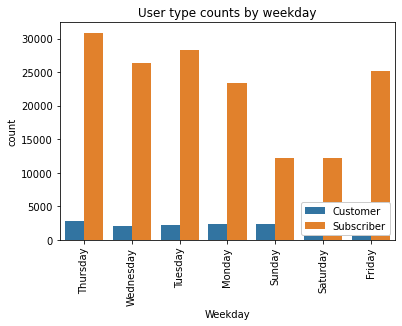

In [52]:
#Count plot of Weekday versus User type
ax = sb.countplot(data = df, x = 'Weekday', hue = 'user_type')
ax.legend(loc = 4, framealpha = 1)
plt.xticks(rotation = 90);
plt.title("User type counts by weekday")

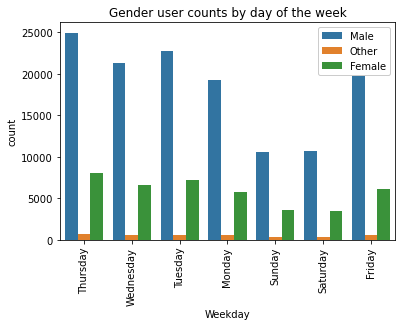

In [53]:
ax = sb.countplot(data = df, x = 'Weekday', hue = 'member_gender')
ax.legend(loc = 1, framealpha = 1)
plt.title("Gender user counts by day of the week")
plt.xticks(rotation = 90);

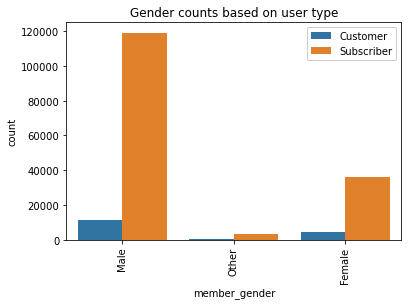

In [54]:
ax = sb.countplot(data = df, x = 'member_gender', hue = 'user_type')
ax.legend(loc = 1, framealpha = 1)
plt.title("Gender counts based on user type")
plt.xticks(rotation = 90);

As expected usually the younger age group tends to do longer trips, with longer trips seemingly tapering off towards the older age group. There seems to be a higher density of people doing small trips regardless of the age, with older people trending towards very short trips.

Some trends identified fromt he Bivariate exploration:

- Weekdays are busier than weekends
- Female and other riders have long trips on average compared to the male riders.
- Customers generally have longert rips combared to subscribers.
- There is a large drop off in trip duration for much older members between 80 to 100. It is likely the data sample is a lot smaller in these groupings as well. The variation in the average trip also increases as we get into the older groups (60+ age) as there is less data compared to the younger age groups (age 18 to 60).
- In terms of station distance, the younger groups trips range from 1.25 km to 2.00 km on average. (age 18 to 60), while older groups age 60 have a much larger variation in average distance, with the 70 to 90 age group having the largest variation based on the lineplot.
- The subscribers using the bikeshare program is significantly more than the customer user types.

## 4.0 Multivariate Exploration
<a id = "multivariate"></a>

Finally during the multivariate exploration, the various numeric variables are plotted together against different subgroups (categorical  user type, gender and weekday) as the third variable to understand if the different group types have an effect on the bike trips in obvious ways.

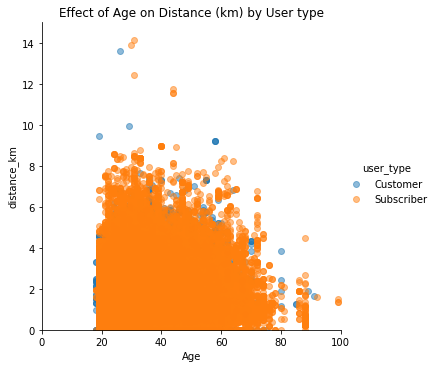

In [55]:
df_sub = df.loc[df['user_type'].isin(['Customer', 'Subscriber'])]

#plotting
g = sb.FacetGrid(data = df_sub, hue = 'user_type', height = 5)
g.map(plt.scatter, 'Age', 'distance_km',  alpha = 5/10)
plt.ylim([0, 15])
plt.xlim([0, 100])
plt.title("Effect of Age on Distance (km) by User type")
g.add_legend();

Unfortenetely due to the immense number of subcribers versus customers counts based on previous visualizations, it is easier to compare the two user types using separate graphs.

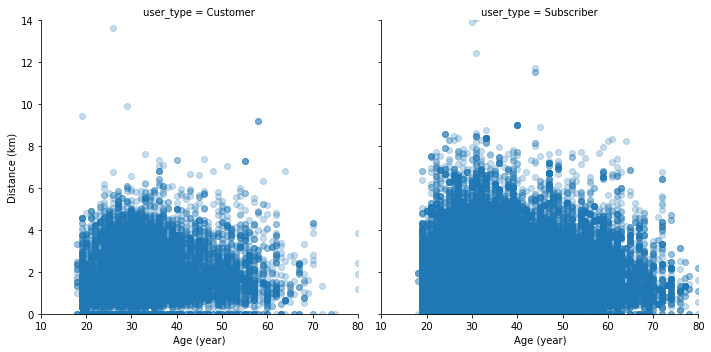

In [56]:
#Add Facet graph to separate all Two to get a clearer picture
g = sb.FacetGrid(data = df_sub, col = 'user_type', col_wrap = 2, height = 5,
                 xlim = [10, 80], ylim = [0, 14])
g.map(plt.scatter, 'Age', 'distance_km', alpha=0.25)
g.set_xlabels('Age (year)')
g.set_ylabels('Distance (km)')

plt.show()

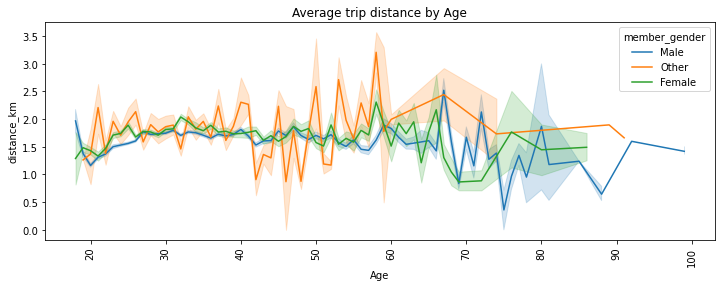

In [57]:
#Line plot shows the mean and 95% confidence intevals
fig,ax = plt.subplots(figsize=(12,4))
sb.lineplot(data= df, x='Age', y='distance_km', hue = 'member_gender')# hue='Year', ax=ax, palette='nipy_spectral')
ax.set(title="Average trip distance by Age")
plt.xticks(rotation = 90);

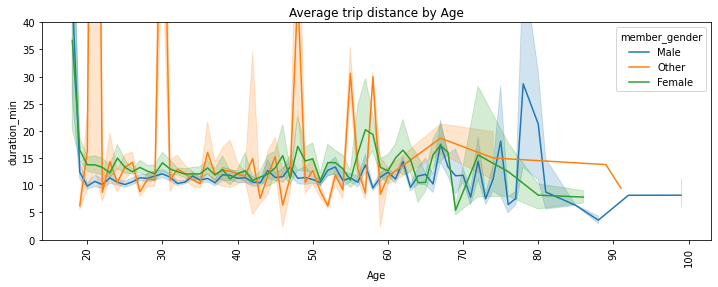

In [58]:
#Line plot shows the mean and 95% confidence intevals
fig,ax = plt.subplots(figsize=(12,4))
sb.lineplot(data= df, x='Age', y='duration_min', hue = 'member_gender')# hue='Year', ax=ax, palette='nipy_spectral')
ax.set(ylim=(0, 40))
ax.set(title="Average trip distance by Age")
plt.xticks(rotation = 90);

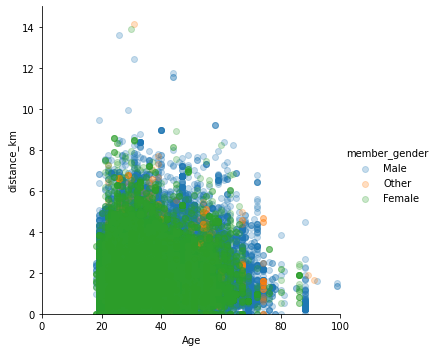

In [59]:
df_sub = df.loc[df['member_gender'].isin(['Male', 'Female', 'Other'])]

#plotting
g = sb.FacetGrid(data = df_sub, hue = 'member_gender', height = 5)
g.map(plt.scatter, 'Age', 'distance_km',  alpha = 0.25)
plt.ylim([0, 15])
plt.xlim([0, 100]) 
g.add_legend();

Similar to the previous scatter plot, a clearer picture can be obtained by splitting the graphs up.

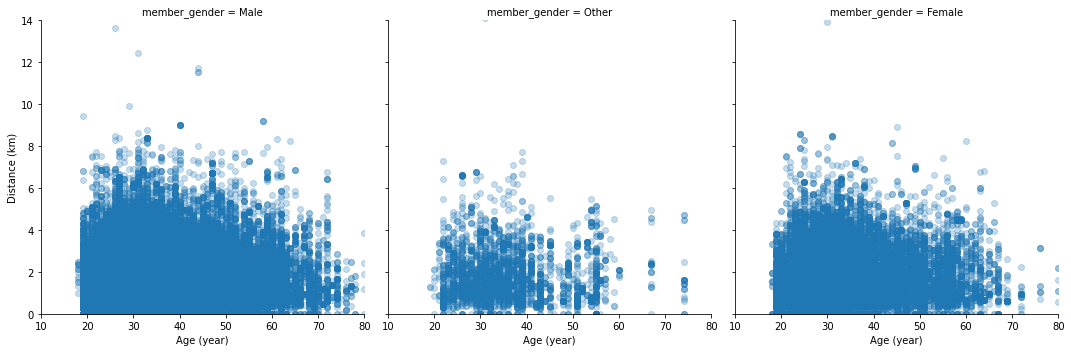

In [60]:
#Add Facet graph to separate all three to get a clearer picture
g = sb.FacetGrid(data = df_sub, col = 'member_gender', col_wrap = 3, height = 5,
                 xlim = [10, 80], ylim = [0, 14])
g.map(plt.scatter, 'Age', 'distance_km', alpha=0.25)
g.set_xlabels('Age (year)')
g.set_ylabels('Distance (km)')

plt.show()

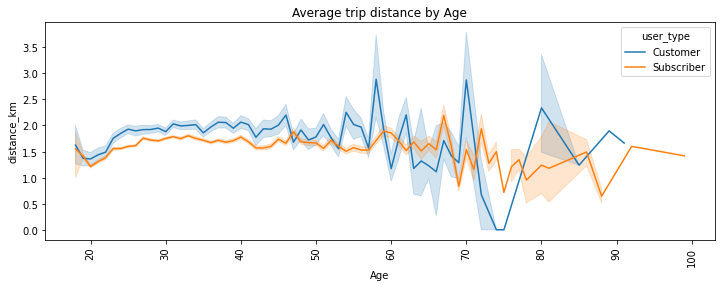

In [61]:
#Line plot shows the mean and 95% confidence intevals
fig,ax = plt.subplots(figsize=(12,4))
sb.lineplot(data= df, x='Age', y='distance_km', hue = 'user_type')# hue='Year', ax=ax, palette='nipy_spectral')
#ax.set(xlim=(18, 80))
#ax.set(ylim=(0.5, 2.5))
ax.set(title="Average trip distance by Age")
plt.xticks(rotation = 90);

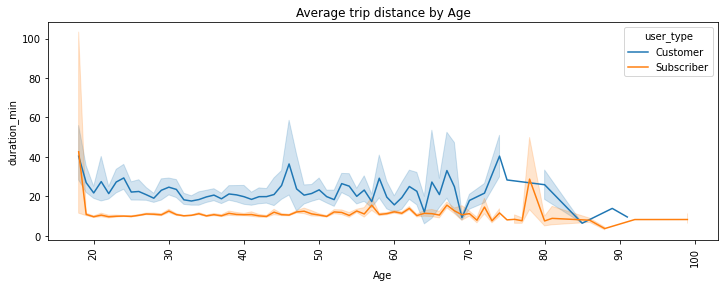

In [62]:
#Line plot shows the mean and 95% confidence intevals
fig,ax = plt.subplots(figsize=(12,4))
sb.lineplot(data= df, x='Age', y='duration_min', hue = 'user_type')# hue='Year', ax=ax, palette='nipy_spectral')
ax.set(title="Average trip distance by Age")
plt.xticks(rotation = 90);

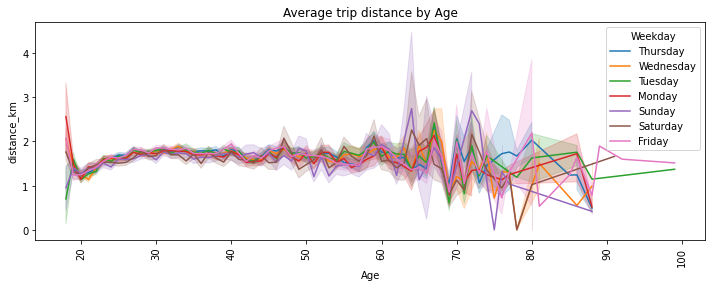

In [63]:
#Line plot shows the mean and 95% confidence intevals
fig,ax = plt.subplots(figsize=(12,4))
sb.lineplot(data= df, x='Age', y='distance_km', hue = 'Weekday')# hue='Year', ax=ax, palette='nipy_spectral')
ax.set(title="Average trip distance by Age")
plt.xticks(rotation = 90);

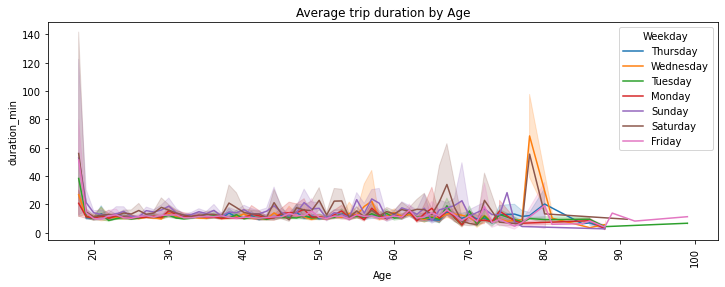

In [64]:
#Line plot shows the mean and 95% confidence intevals
fig,ax = plt.subplots(figsize=(12,4))
sb.lineplot(data= df, x='Age', y='duration_min', hue = 'Weekday')# hue='Year', ax=ax, palette='nipy_spectral')
ax.set(title="Average trip duration by Age")
plt.xticks(rotation = 90);

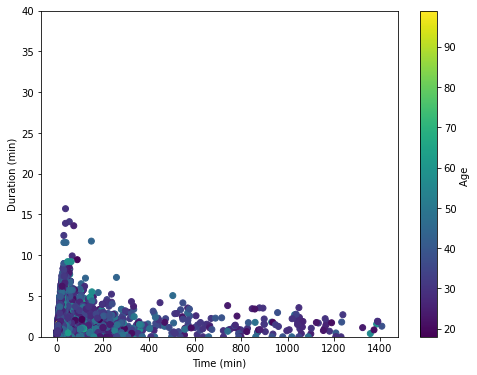

In [65]:
# Heatmap 
plt.figure(figsize = [8,6])
plt.scatter(data = df, x = 'duration_min', y = 'distance_km', c = 'Age')
plt.colorbar(label = 'Age ');
#plt.xlim(0, 80)
plt.ylim(0,40)
plt.xlabel('Time (min)')
plt.ylabel('Duration (min)');



Some quick trends stand out for the mulitvariate visualizations:

- The distance in km was on average higher for customers compared to the subscriber user base up until age 60. After age 60 the comparison is less consistent. This was surprising.
- The duaration of the customer user base is on average longer by more than 10 minutes compared to the subcriber user base for all age groups. 
- From a visual standpoint, there is not a signifcant difference in distance (km) by age when comparing the different gender between male and female. The "other" gender has significantly less data, especially with the older age gropus compared to the other two genders.
- For genders, there wasn't a significant difference between male and female duration and distance, although female seemed to have slightly longer trips than males. The "other" gender was a lot more variable and does not show a consistent trend compared to the others. This is likely contributed to the lower data counts for the "other" gender.
- When comparing the effects of the weekday on the average trip duration and distance, nothing stood out significantly, although there is a larger variation seen in the distance for older age groups (60+).



In [66]:
#This database is exported for usage in the slide deck.
df.to_csv('cleaned_Gobike_Data.csv')